# First Survey Results 

The CSP political discussion/debate community sent out a survey to it's members in August-Oct of 2020 to get feedback on how the group is doing. This notebook is designed to wrangle the survey results and create visualizations to share with the CSP staff and members where appropriate. It has been sanatize of all PII.

### Quick Links To Results
* **Group Resutls**
  * [Group Political Lean](#Group-Political-Lean)
  * [Satisfaction](#Statisfaction)
    * [By Observed Political Lean](#Satisfaction-by-Political-Lean)
      * [Percentage](#Satisfaction-Percentage-by-Political-Lean)
  * [Staff Fairness](#Staff-Fairness)
    * [By Observed Political Lean](#Staff-Fairness-Scores-by-Political-Lean)
      * [Percentage](#Percent-of-Staff-Fairness-Scores-by-Political-Lean)
  * [Suggestions](#Suggestion)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creates a function to explode colum answers to new rows when needed
def explode_str(df, col, sep):
    s = df[col]
    i = np.arange(len(s)).repeat(s.str.count(sep) + 1)
    return df.iloc[i].assign(**{col: sep.join(s).split(sep)})

print('Initalized')

Initalized


In [2]:
# Load the csv into a df
survey = pd.read_csv('C:/Users/anthony/Documents/Data_Science/Facebook Data/CSPGroupSurvey2.csv')
survey.head()

,Timestamp,"On a scale of 1 to 10, 1 being the lowest and 10 being the highest, what is your overall satisfaction with the group","On a scale of 1 to 10, with 1 being the lowest and 10 being the highest, how fair would you say the moderators and admins are in enforcing the rules",How would you label CSP politically on the whole?,"Based upon your experience in CSP, do you know of one or several of your friends that might be interested In being members?",Do you have any suggestions on how to improve the group
0,2020/09/11 12:10:03 PM EST,7,9,Moderate/Center,Maybe,NaN
1,2020/09/11 12:13:18 PM EST,7,8,Liberal,Yes,Try to recruit more conservative members
2,2020/09/11 12:15:34 PM EST,6,7,Random,No,Have a three strikes rule for reality deniers
3,2020/09/11 12:40:34 PM EST,7,8,Moderate/Center,Yes,NaN
4,2020/09/11 1:49:03 PM EST,4,4,Alt-right,No,Require posts to come from legitimate sources....


[Jump to Top](#First-Survey-Results)

In [3]:
# Rename the columns to what they measure instead of the question
survey.columns=["Time", "Satisfaction", "Staff_Fairness", "Group_Politics", "Recommend", "Suggestion"]
survey.drop(columns=['Time'])


,Satisfaction,Staff_Fairness,Group_Politics,Recommend,Suggestion
0,7,9,Moderate/Center,Maybe,NaN
1,7,8,Liberal,Yes,Try to recruit more conservative members
2,6,7,Random,No,Have a three strikes rule for reality deniers
3,7,8,Moderate/Center,Yes,NaN
4,4,4,Alt-right,No,Require posts to come from legitimate sources....
...,...,...,...,...,...
92,7,7,Fairly balanced but Im pretty new here,Yes,Not at this time
93,8,8,Liberal,Maybe,Not this time
94,7,8,Center Right,Maybe,Keep it as os
95,7,8,Center Right,Maybe,NaN


For full transparancy, print the results as given for the group's observed political lean

In [4]:
survey.Group_Politics.value_counts()

Center Left                                                                                                                          28
Moderate/Center                                                                                                                      23
Liberal                                                                                                                              14
Leftist                                                                                                                              12
Center Right                                                                                                                          5
Alt-right                                                                                                                             1
Academic Politics by laity                                                                                                            1
Pretty left/ progressive with a few very right i

In [5]:
# Rename the results of the observed group's plitical leanings to things that make sense and are workable. 
survey.Group_Politics.replace({'Random':'Moderate/Center',
       'All over the map':'Moderate/Center',
       'Academic Politics by laity':'Moderate/Center',
       "I see a mixed bag on the posts I've interacted with, not sure. Usu depends on the post.":'Moderate/Center',
       'Mostly regressive':'Leftist', 'DNC Dems.':'Moderate/Center', 'Far left':'Leftist',
       'seems pretty diverse':'Moderate/Center',
       'Pretty left/ progressive with a few very right in that mix. ':'Leftist',
       'The full spectrum':'Moderate/Center',
       'I would say 80 percent left, 15 kinda the middle of the road and 5 percent right.  But that’s my observation on who participates.':'Leftist',
       'Depends on admin involved':'Moderate/Center',
       'Fairly balanced but Im pretty new here ':'Moderate/Center'}, inplace=True)

# Assign the results to a new df to manipulate
Politics = survey['Group_Politics']
Politics

0     Moderate/Center
1             Liberal
2     Moderate/Center
3     Moderate/Center
4           Alt-right
           ...       
92    Moderate/Center
93            Liberal
94       Center Right
95       Center Right
96            Leftist
Name: Group_Politics, Length: 97, dtype: object

## Group Political Lean

[Jump to Top](#First-Survey-Results)

Text(0.5, 1.0, 'Observed Group Political Lean by Members')

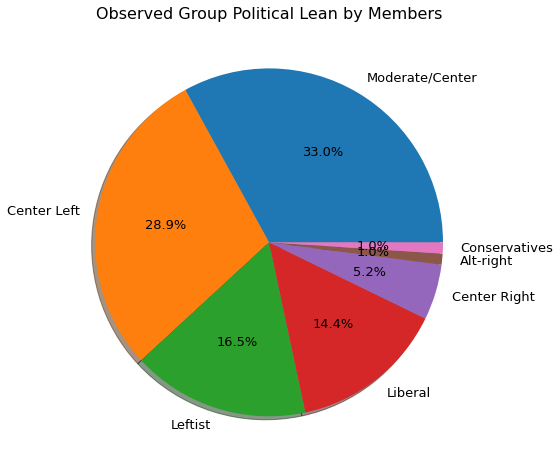

In [6]:
# Plot the renamed results
plt.figure(figsize=(8,8))
(Politics.value_counts()).plot.pie(autopct='%1.1f%%', shadow=True, startangle=0, fontsize=13)
plt.ylabel('') 
plt.title('Observed Group Political Lean by Members', fontsize = 16)

## Statisfaction

Members were asked to rate their satisfaction with the group on scale from 1 to 10 with 1 being the lowest and 10 being the highest.

[Jump to Top](#First-Survey-Results)

The median satisfaction score is - 8.0
The average satisfaction score is - 7.0


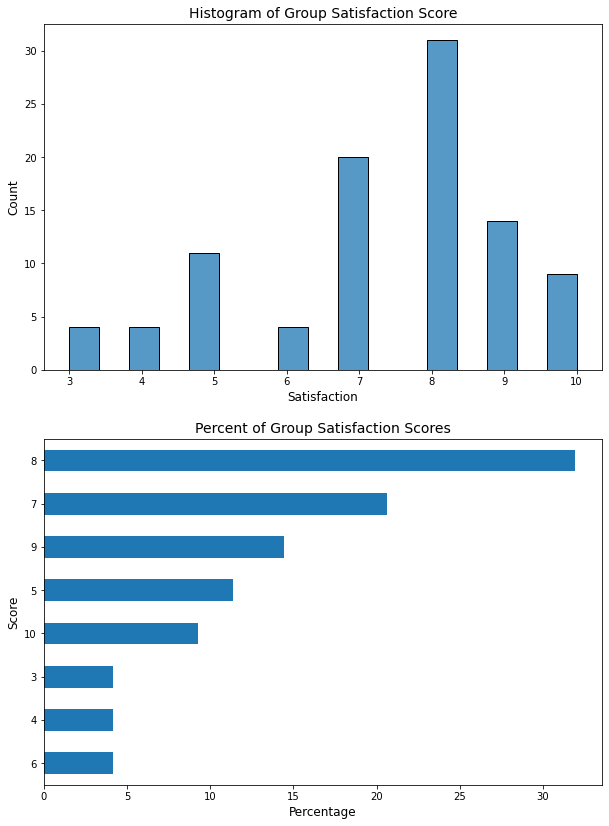

In [7]:
plt.figure(figsize=(10, 14))
plt.subplot(211)
sns.histplot(data=survey, x=survey['Satisfaction'])
plt.title('Histogram of Group Satisfaction Score', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Satisfaction', fontsize=12)

plt.subplot(212)
(survey['Satisfaction'].value_counts()/survey.shape[0] * 100).sort_values(ascending=True).plot(kind='barh')
plt.title('Percent of Group Satisfaction Scores', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

print(f"The median satisfaction score is - {(survey['Satisfaction'].median())}")
print(f"The average satisfaction score is - {round((survey['Satisfaction'].mean()),0)}")
plt.show()

In [8]:
survey[['Satisfaction','Group_Politics']].groupby('Group_Politics').agg(['count', 'mean', 'median'])

Satisfaction                 
                       count      mean median
Group_Politics                               
Alt-right                  1  4.000000      4
Center Left               28  7.750000      8
Center Right               5  5.800000      6
Conservatives              1  5.000000      5
Leftist                   16  7.375000      8
Liberal                   14  7.214286      8
Moderate/Center           32  7.406250      8

## Satisfaction by Political Lean

[Jump to Top](#First-Survey-Results)

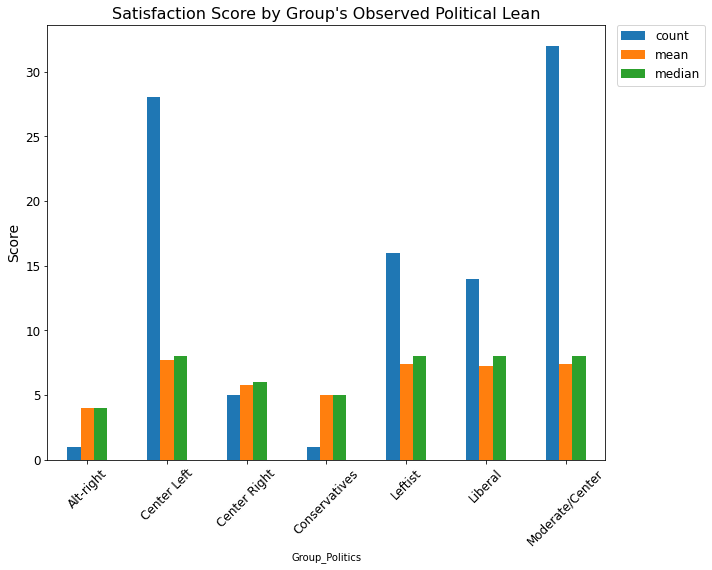

In [9]:
#Plot Staff Fairness's mean, median, and counts for each Political Lean
survey[['Satisfaction','Group_Politics']].groupby('Group_Politics').agg(['count', 'mean', 'median']).plot(
    kind='bar',
    figsize=(10, 8),
    rot=45,
    fontsize=12)
plt.legend(['count', 'mean', 'median'], bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize=12)
plt.title("Satisfaction Score by Group's Observed Political Lean", fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.show()

## Satisfaction Percentage by Political Lean
[Jump to Top](#First-Survey-Results)

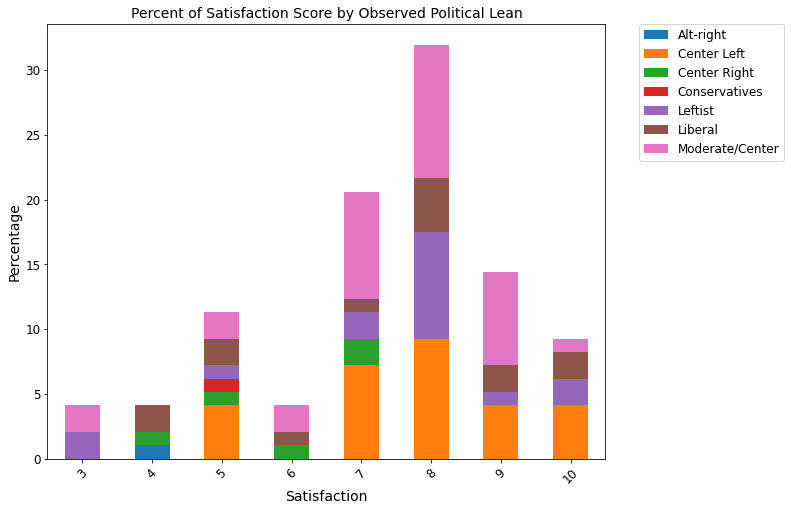

In [17]:
round(survey[['Satisfaction','Group_Politics']].groupby(['Satisfaction', 'Group_Politics']).size()/survey.shape[0]*100, 2).unstack().plot(
    kind='bar', 
    stacked=True,
    fontsize=12,
    figsize=(10,8),
    rot=45)
plt.legend(bbox_to_anchor=(1.32, 1),borderaxespad=0, fontsize=12)
plt.title("Percent of Satisfaction Score by Observed Political Lean", fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Satisfaction', fontsize=14)
plt.show()

## Staff Fairness

Members were asked to rate how fair staff members (mods and admins) are on scale from 1 to 10 with 1 being the lowest and 10 being the highest.


[Jump to Top](#First-Survey-Results)

The median fairness score is - 8.0
The average fairness score is - 8.0


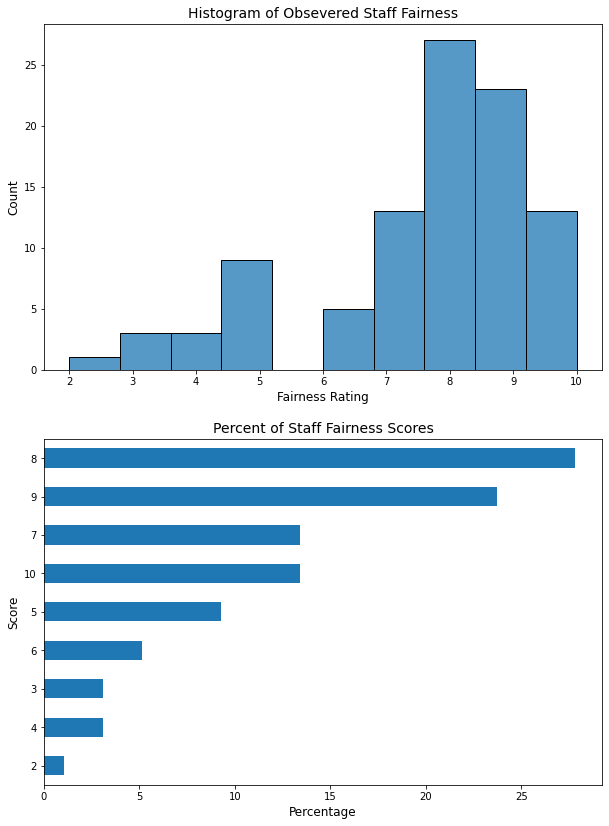

In [11]:
plt.figure(figsize=(10, 14))
plt.subplot(211)
sns.histplot(data=survey, x='Staff_Fairness')
plt.title('Histogram of Obsevered Staff Fairness', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Fairness Rating', fontsize=12)

plt.subplot(212)
(survey['Staff_Fairness'].value_counts()/survey.shape[0] * 100).sort_values(ascending=True).plot(kind='barh')
plt.title('Percent of Staff Fairness Scores', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

print(f"The median fairness score is - {(survey['Staff_Fairness'].median())}")
print(f"The average fairness score is - {round((survey['Staff_Fairness'].mean()),0)}")
plt.show()

In [12]:
survey[['Staff_Fairness','Group_Politics']].groupby('Group_Politics').agg(['count', 'mean', 'median'])

Staff_Fairness                 
                         count      mean median
Group_Politics                                 
Alt-right                    1  4.000000    4.0
Center Left                 28  8.428571    9.0
Center Right                 5  5.400000    5.0
Conservatives                1  7.000000    7.0
Leftist                     16  7.375000    7.5
Liberal                     14  8.428571    8.0
Moderate/Center             32  7.250000    8.0

## Staff Fairness Scores by Political Lean 

[Jump to Top](#First-Survey-Results)

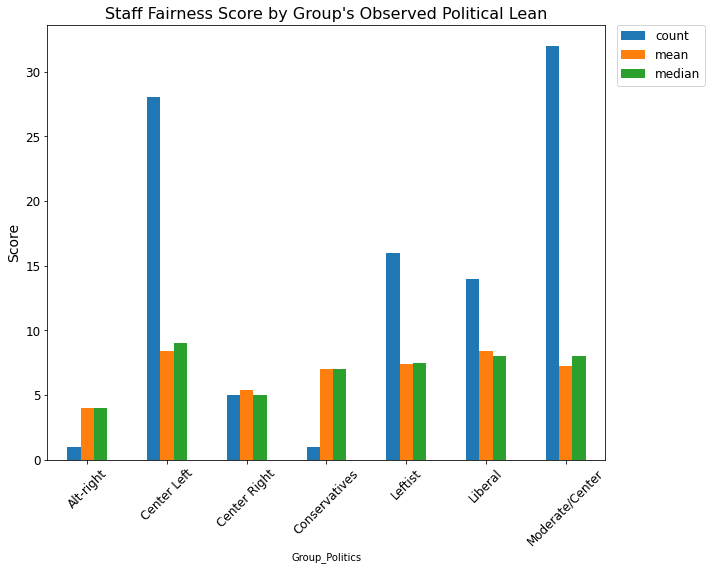

In [13]:
#Plot Staff Fairness's mean, median, and counts for each Political Lean
survey[['Staff_Fairness','Group_Politics']].groupby('Group_Politics').agg(['count', 'mean', 'median']).plot(
    kind='bar',
    figsize=(10, 8),
    rot=45,
    fontsize=12)
plt.legend(['count', 'mean', 'median'], bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize=12)
plt.title("Staff Fairness Score by Group's Observed Political Lean", fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.show()

## Percent of Staff Fairness Scores by Political Lean 

[Jump to Top](#First-Survey-Results)

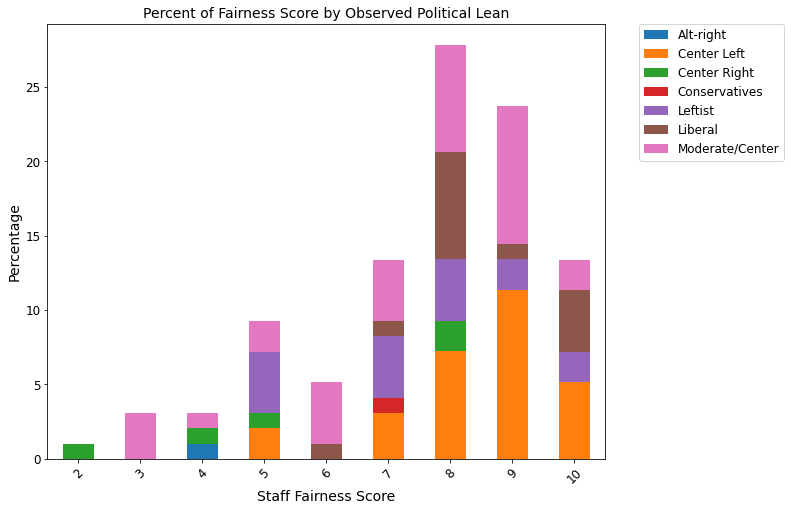

In [16]:
round(survey[['Staff_Fairness','Group_Politics']].groupby(['Staff_Fairness', 'Group_Politics']).size()/survey.shape[0]*100, 2).unstack().plot(
    kind='bar', 
    stacked=True,
    fontsize=12,
    figsize=(10,8),
    rot=45)
plt.legend(bbox_to_anchor=(1.32, 1),borderaxespad=0, fontsize=12)
plt.title("Percent of Fairness Score by Observed Political Lean", fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Staff Fairness Score', fontsize=14)
plt.show()

## Suggestion

Members were asked to give any feedback they had to make the group better. The results are printed below.

[Jump to Top](#First-Survey-Results)


In [15]:
sugestions = list(survey['Suggestion'].dropna())
x=0
for sugestion in sugestions:
    x = x + 1
    print(f'#{x}')
    print(f'{sugestion} \n \n')

#1
Try to recruit more conservative members 
 

#2
Have a three strikes rule for reality deniers 
 

#3
Require posts to come from legitimate sources. Don't allow shit posting, racism, and obvious lies. 
 

#4
All of the admins seem to be liberal in their leanings. Maybe think about adding someone center-right to actual conservative to add balance  
 

#5
I've only been here for a few months. Lots of good and lots of crazy.  So, normal.  
 

#6
Stop giving a platform to people who clearly arent here to learn or debate and are only trolling.  
 

#7
I think the slight conservatism of the moderators allows rightward thinkers to feel able to express their opinions. The smattering of shitposter lefties and shitposter righties is a symptom of current US political discourse, not anything endemic to the group. Of the rather few political groups I’ve found, this one is my favorite – freest discussion without going gonzo, broadest range of ideologies. & the podcast is pretty awesome. I think th